In [140]:
import numpy as np
# to get plots displayed in notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi

In [141]:
# Next, get all data points for models
# from output .dat files

# after "=" write path to the .dat file with Pk data (..._pk) or Cl data (..._cl)
# Output files (from .ini files above) I used are in PT-check/class/test_output/
# for example, lcdm_pk = "/Users/aizhan.akh/Documents/Projects/PT-check/class/test_output/lcdm_pk.dat"

lcdm_pk_l = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/lcdm_linear_pk.dat"               # for LCDM
lcdm_cl_l = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/lcdm_linear_cl_lensed.dat"
lcdm_pk_h = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/lcdm_halofit_pk_nl_halofit.dat"
lcdm_cl_h = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/lcdm_halofit_cl_lensed.dat"
lcdm_pk_pt = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/lcdm_eft_pk_nl_pt.dat"
lcdm_cl_pt = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/lcdm_eft_cl_lensed.dat"


dmeff0_pk_l = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/dmeff_n0_linear_pk.dat"               # for IDM with n = 0
dmeff0_cl_l = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/dmeff_n0_linear_cl_lensed.dat"        # m = 1 GeV
dmeff0_pk_h = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/dmeff_n0_halofit_pk_nl_halofit.dat"   # sigma = 2.1e-26
dmeff0_cl_h = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/dmeff_n0_halofit_cl_lensed.dat" 
dmeff0_pk_pt = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/dmeff_n0_eft_pk_nl_pt.dat" 
dmeff0_cl_pt = "/u/aizhana/Projects/CodeCombined/output/dmeff_n0/dmeff_n0_eft_cl_lensed.dat" 
 

# NOTE to self: CLASS outputs ClPP as ClPP*l*(l+1)!

# check LCDM model linear
Pk_lcdm_l = np.genfromtxt(lcdm_pk_l)[:,1]
kk_lcdm_l = np.genfromtxt(lcdm_pk_l)[:,0]
ll_lcdm_l = np.genfromtxt(lcdm_cl_l)[:,0]
clTT_lcdm_l = np.genfromtxt(lcdm_cl_l)[:,1]
clPP_lcdm_l = np.genfromtxt(lcdm_cl_l)[:,5]
# check LCDM model HALOFIT
Pk_lcdm_h = np.genfromtxt(lcdm_pk_h)[:,1]
kk_lcdm_h = np.genfromtxt(lcdm_pk_h)[:,0]
ll_lcdm_h = np.genfromtxt(lcdm_cl_h)[:,0]
clTT_lcdm_h = np.genfromtxt(lcdm_cl_h)[:,1]
clPP_lcdm_h = np.genfromtxt(lcdm_cl_h)[:,5]
# check LCDM model PERTURBATION THEORY
Pk_lcdm_pt = np.genfromtxt(lcdm_pk_pt)[:,1]
kk_lcdm_pt = np.genfromtxt(lcdm_pk_pt)[:,0]
ll_lcdm_pt = np.genfromtxt(lcdm_cl_pt)[:,0]
clTT_lcdm_pt = np.genfromtxt(lcdm_cl_pt)[:,1]
clPP_lcdm_pt = np.genfromtxt(lcdm_cl_pt)[:,5]


# check Dmeff model w/ n= 0 LINEAR
Pk_dmeff_0_l = np.genfromtxt(dmeff0_pk_l)[:,1]
kk_dmeff_0_l = np.genfromtxt(dmeff0_pk_l)[:,0]
ll_dmeff_0_l = np.genfromtxt(dmeff0_cl_l)[:,0]
clTT_dmeff_0_l = np.genfromtxt(dmeff0_cl_l)[:,1]
clPP_dmeff_0_l = np.genfromtxt(dmeff0_cl_l)[:,5]
# check Dmeff model w/ n= 0 HALOFIT
Pk_dmeff_0_h = np.genfromtxt(dmeff0_pk_h)[:,1]
kk_dmeff_0_h = np.genfromtxt(dmeff0_pk_h)[:,0]
ll_dmeff_0_h = np.genfromtxt(dmeff0_cl_h)[:,0]
clTT_dmeff_0_h = np.genfromtxt(dmeff0_cl_h)[:,1]
clPP_dmeff_0_h = np.genfromtxt(dmeff0_cl_h)[:,5]
# check Dmeff model w/ n= 0 PERTURBATION THEORY
Pk_dmeff_0_pt = np.genfromtxt(dmeff0_pk_pt)[:,1]
kk_dmeff_0_pt = np.genfromtxt(dmeff0_pk_pt)[:,0]
ll_dmeff_0_pt = np.genfromtxt(dmeff0_cl_pt)[:,0]
clTT_dmeff_0_pt = np.genfromtxt(dmeff0_cl_pt)[:,1]
clPP_dmeff_0_pt = np.genfromtxt(dmeff0_cl_pt)[:,5]



In [142]:
from codex import pk_nonlinear as pk

In [143]:
kk, Pk = pk(kk_lcdm_l, Pk_lcdm_l)
kk1, Pk1 = pk(kk_dmeff_0_l, Pk_dmeff_0_l)


/usr/licensed/anaconda3/5.2.0/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [144]:
# now get spectra with EFT CORRECTIONS using PYTHON 

# we want to add Pk to lcdm values which correspond to particular kk values
# so we need to interpolte lcdm values for those particular values of kk
lcdm_interp = np.interp(kk, kk_lcdm_l, Pk_lcdm_l)
lcdm_new = Pk + lcdm_interp

# same interpolation with dmeff sets
dmeff0_interp = np.interp(kk1, kk_dmeff_0_l, Pk_dmeff_0_l)
dmeff0_new = Pk1 + dmeff0_interp

# calculate residuals
res_new1 = (dmeff0_new-lcdm_new)/lcdm_new


<IPython.core.display.Javascript object>


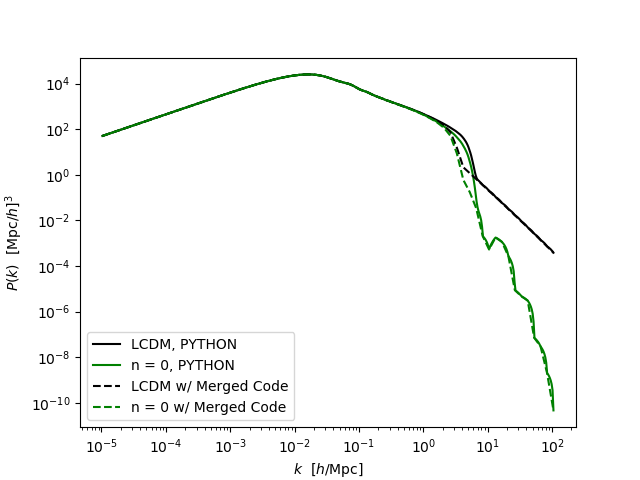

In [145]:
# plots Pk spectra MERGED CODE VS PYTHON CODE
# I think discrepancies are not that large and mainly come from the fact that the merged code is more precise
plt.figure()
plt.xscale('log');plt.yscale('log');#plt.xlim(1.e-5, 10); plt.ylim(1.e-2, 1.e5)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk, lcdm_new, 'k-',label = "LCDM, PYTHON")
plt.plot(kk1, dmeff0_new, 'g-',label = "n = 0, PYTHON")

plt.plot(kk_lcdm_pt,Pk_lcdm_pt,'k--', label = "LCDM w/ Merged Code")
plt.plot(kk_dmeff_0_pt,Pk_dmeff_0_pt,'g--', label = 'n = 0 w/ Merged Code')

plt.legend(loc = "lower left")
#plt.title("")
plt.show()
plt.savefig("PertTheory corrections Python vs MergedCode.pdf")

<IPython.core.display.Javascript object>


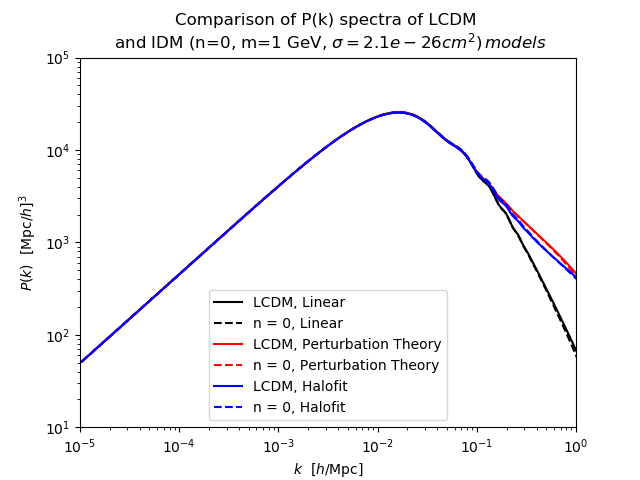

In [159]:
# plots all Pk spectra 
# I think discrepancies are not that large and mainly come from the fact that the merged code is more precise
plt.figure()
plt.xscale('log');plt.yscale('log');plt.xlim(1.e-5, 1); plt.ylim(1.e1, 1.e5)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk_lcdm_l, Pk_lcdm_l, 'k-',label = "LCDM, Linear")
plt.plot(kk_dmeff_0_l, Pk_dmeff_0_l, 'k--',label = "n = 0, Linear")

plt.plot(kk_lcdm_pt,Pk_lcdm_pt,'r-', label = "LCDM, Perturbation Theory")
plt.plot(kk_dmeff_0_pt,Pk_dmeff_0_pt,'r--', label = 'n = 0, Perturbation Theory')

plt.plot(kk_lcdm_h,Pk_lcdm_h,'b-', label = "LCDM, Halofit")
plt.plot(kk_dmeff_0_h,Pk_dmeff_0_h,'b--', label = 'n = 0, Halofit')

plt.legend(loc = "lower center")
plt.title("Comparison of P(k) spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\, models$')
plt.show()
plt.savefig("P(k) spectra of LCDM and IDM models.pdf")

<IPython.core.display.Javascript object>


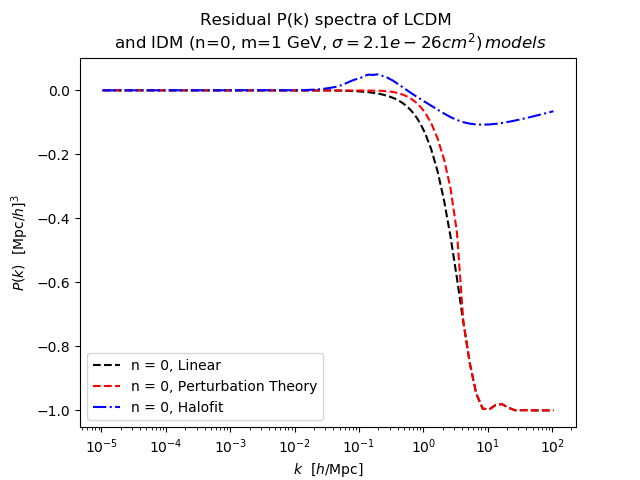

In [161]:
# plots all residual Pk spectra 
# I think discrepancies are not that large and mainly come from the fact that the merged code is more precise
plt.figure()
plt.xscale('log');plt.yscale('linear');#plt.xlim(1.e-5, 1); #plt.ylim(1.e-2, 1.e5)
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')

plt.plot(kk_dmeff_0_l, (Pk_dmeff_0_l - Pk_lcdm_l)/Pk_lcdm_l, 'k--',label = "n = 0, Linear")

plt.plot(kk_dmeff_0_pt,(Pk_dmeff_0_pt - Pk_lcdm_pt)/Pk_lcdm_pt,'r--', label = 'n = 0, Perturbation Theory')

plt.plot(kk_dmeff_0_h,(Pk_dmeff_0_h - Pk_lcdm_h)/Pk_lcdm_h,'b-.', label = 'n = 0, Halofit')

plt.legend(loc = "lower left")
plt.title("Residual P(k) spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\, models$')
plt.show()
plt.savefig("Residual P(k) of LCDM and IDM.pdf")

<IPython.core.display.Javascript object>


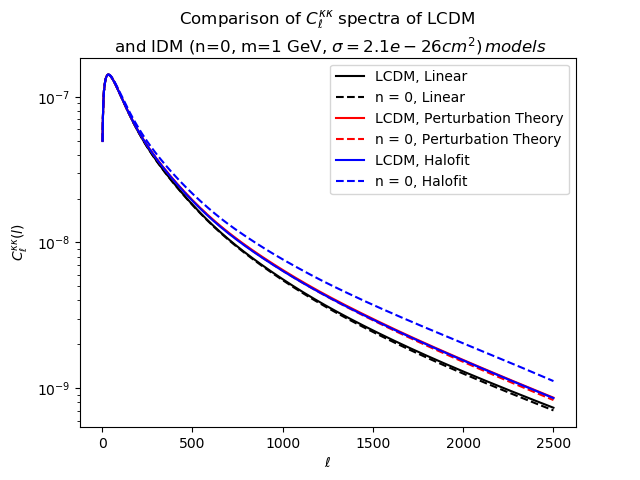

In [165]:
# plots all cl/kappa/kappa spectra 

plt.figure()
plt.xscale('linear');plt.yscale('log');#plt.xlim(0, 2500); #plt.ylim(1.e-2, 1.e5)
plt.xlabel(r'${\ell}$')
plt.ylabel(r'$C_{\ell} ^{\kappa\kappa}(l) $')
plt.plot(ll_lcdm_l, ((ll_lcdm_l*(ll_lcdm_l+1))**1)*clPP_lcdm_l, 'k-',label = "LCDM, Linear")
plt.plot(ll_dmeff_0_l, ((ll_dmeff_0_l*(ll_dmeff_0_l+1))**1)*clPP_dmeff_0_l, 'k--',label = "n = 0, Linear")

plt.plot(ll_lcdm_pt, ((ll_lcdm_pt*(ll_lcdm_pt+1))**1)*clPP_lcdm_pt,'r-', label = "LCDM, Perturbation Theory")
plt.plot(ll_dmeff_0_pt, ((ll_dmeff_0_pt*(ll_dmeff_0_pt+1))**1)*clPP_dmeff_0_pt,'r--', label = 'n = 0, Perturbation Theory')

plt.plot(ll_lcdm_h, ((ll_lcdm_h*(ll_lcdm_h+1))**1)*clPP_lcdm_h,'b-', label = "LCDM, Halofit")
plt.plot(ll_dmeff_0_h, ((ll_dmeff_0_h*(ll_dmeff_0_h+1))**1)*clPP_dmeff_0_h,'b--', label = 'n = 0, Halofit')

plt.legend(loc = "upper right")
plt.title("Comparison of " + r'$C_{\ell} ^{\kappa\kappa}$'+ " spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\, models$')
plt.show()
plt.savefig("Cl(kappa|kappa) spectra.pdf")

<IPython.core.display.Javascript object>


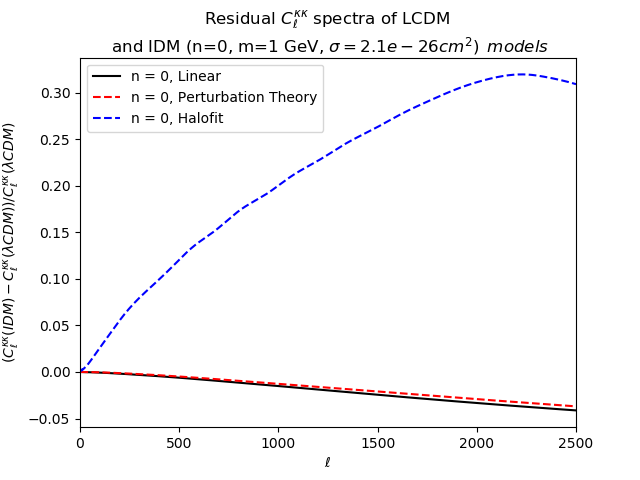

In [170]:
# plots all residual Cl/kappa/kappa spectra 

plt.figure()
plt.xscale('linear');plt.yscale('linear');plt.xlim(0, 2500); #plt.ylim(1.e-2, 1.e5)
plt.xlabel(r'${\ell}$')
plt.ylabel(r'$(C_{\ell}^{\kappa\kappa}(IDM) - C_{\ell}^{\kappa\kappa}({\lambda}CDM))/C_{\ell}^{\kappa\kappa}({\lambda}CDM) $')

plt.plot(ll_dmeff_0_l, (clPP_dmeff_0_l- clPP_lcdm_l)/clPP_lcdm_l, 'k-',label = "n = 0, Linear")

plt.plot(ll_dmeff_0_pt, (clPP_dmeff_0_pt - clPP_lcdm_pt)/clPP_lcdm_pt,'r--', label = 'n = 0, Perturbation Theory')

plt.plot(ll_dmeff_0_h, (clPP_dmeff_0_h - clPP_lcdm_h)/clPP_lcdm_h,'b--', label = 'n = 0, Halofit')

plt.legend(loc = "upper left")
plt.title("Residual " + r'$C_{\ell} ^{\kappa\kappa}$'+ " spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\,\ models$')
plt.show()
plt.savefig("Residual Cl(kappa|kappa) spectra.pdf")

<IPython.core.display.Javascript object>


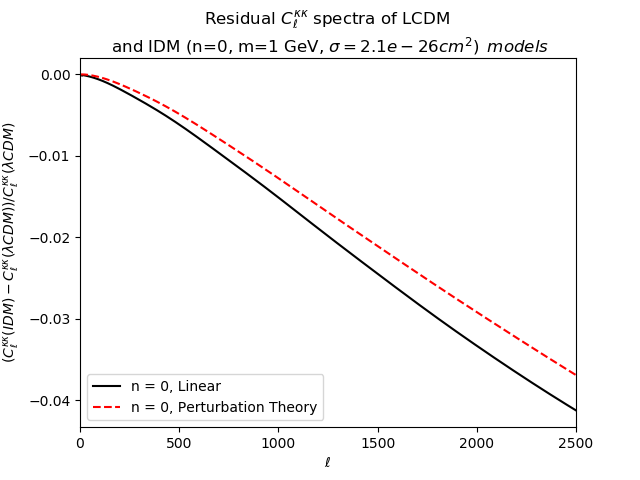

In [172]:
plt.figure()
plt.xscale('linear');plt.yscale('linear');plt.xlim(0, 2500); #plt.ylim(1.e-2, 1.e5)
plt.xlabel(r'${\ell}$')
plt.ylabel(r'$(C_{\ell}^{\kappa\kappa}(IDM) - C_{\ell}^{\kappa\kappa}({\lambda}CDM))/C_{\ell}^{\kappa\kappa}({\lambda}CDM) $')

plt.plot(ll_dmeff_0_l, (clPP_dmeff_0_l- clPP_lcdm_l)/clPP_lcdm_l, 'k-',label = "n = 0, Linear")

plt.plot(ll_dmeff_0_pt, (clPP_dmeff_0_pt - clPP_lcdm_pt)/clPP_lcdm_pt,'r--', label = 'n = 0, Perturbation Theory')

plt.legend(loc = "lower left")
plt.title("Residual " + r'$C_{\ell} ^{\kappa\kappa}$'+ " spectra of LCDM \n " + 'and IDM (n=0, m=1 GeV, ' +r'${\sigma}=2.1e-26 cm^2)\,\ models$')
plt.show()
plt.savefig("Residual Cl(kappa|kappa) spectra_PT_vs_Linear.pdf")
